<a href="https://colab.research.google.com/github/quinbez/Computer-Vision-End-To-End/blob/main/ComputerVision_End_To_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer Vision End to End with Pytorch**

Computer vision is a field of study that focuses on enabling computers to understand and interpret visual data, such as images and videos. It involves various tasks, including image classification, object detection, image segmentation, and image generation.

In PyTorch, you can use built-in functionalities to facilitate training, testing, and validation. The torchvision package provides datasets and transforms for loading and preprocessing common computer vision datasets.

In this notebook we briefly focus on:
* OS Module
* Tarfile Module
* Image Classification
* Matplotlib
* Splitting Datasets
* DataLoader
* Defining Model
* Training Model
* Testing Model

### **The OS Module**

PyTorch provides a way to interact with the operating system through the use of standard Python functions and modules. You can use the os module from the Python standard library to perform operating system-related tasks in conjunction with PyTorch.

The os module in Python provides a way to interact with the operating system. It offers functions for performing various operating system-related tasks.

In [ ]:
# Importing os
import os

The **os.name** attribute in Python's os module returns the name of the operating system dependent module imported. It provides a way to determine the name of the operating system on which the Python interpreter is running.

The value of os.name can be one of the following:

- On Unix-like systems, such as Linux, macOS, and BSD, os.name will be '**posix**'.
- On Windows systems, os.name will be '**nt**'.

In [ ]:
import os
print("The name of the operating system is: ", os.name)

The name of the operating system is:  posix


**os.error** is an exception class in Python's os module that is raised when an operating system-related error occurs. It serves as a general exception for various operating system-related errors, including file or directory operations, process management, and other system-level operations.

In [ ]:
import os
print(os.error())

The **os.getcwd()** function is used to get the current working directory (CWD) as a string. The current working directory refers to the directory in which the Python script is currently being executed.

In [ ]:
import os
print(os.getcwd())

/content


The **os.listdir()** function is used to get a list of all files and directories in a given directory. It returns a list containing the names of the entries in the specified directory.

In [ ]:
import os
print(os.listdir("/content"))

['.config', 'sample_data', 'cifar10.tgz']


The **os.chdir()** function is used to change the current working directory (CWD) to the specified directory. It allows you to navigate and switch to a different directory within your file system.

In [ ]:
import os
print(os.chdir("/content/sample_data"))
print(os.getcwd())

None
/content/sample_data


The **os.mkdir()** function is used to create a new directory (folder) with the specified name.

In [ ]:
import os
print(os.mkdir("/content/computer_vision"))
print(os.listdir("/content"))

None
['.config', 'computer_vision', 'sample_data', 'cifar10.tgz']


The **os.remove()** function in Python's os module is used to delete a file from the file system.

The **os.rmdir()** function in Python's os module is used to delete an empty directory from the file system.

In [ ]:
import os
print(os.rmdir("/content/computer_vision"))
print(os.listdir("/content"))

None
['.config', 'sample_data', 'cifar10.tgz']


**os.path()**

The os.path module in Python provides functions for working with file paths. It offers various utility functions to manipulate and analyze file and directory paths in a platform-independent manner.

**os.path.join()**: used to join one or more path components. It takes multiple path components as arguments and returns a concatenated path string. It handles the proper insertion of the directory separator character (/ or \) based on the operating system.

In [ ]:
import os
path = "/home/quin/Desktop/AI"
print(os.path.join(path, "Books", "Tutorials","Notebooks"))

/home/quin/Desktop/AI/Books/Tutorials/Notebooks


**os.path.basename()** function is used to extract the base name of a file or directory from a given path. It returns the last component of the path, which represents the name of the file or directory without the preceding directories.

In [ ]:
import os
print(os.path.basename("/home/quin/Desktop/AI/Books/Tutorials/Notebooks"))

Notebooks


**os.path.split()** function is used to split a file path into the directory component and the base name component. It returns a tuple containing the directory path and the base name.

In [ ]:
import os
print(os.path.split("/home/quin/Desktop/AI/Books/Tutorials/Notebooks"))

('/home/quin/Desktop/AI/Books/Tutorials', 'Notebooks')


The **os.path.dirname()** function is used to extract the directory component of a given file path. It returns the directory name without the file name itself.

In [ ]:
import os
print(os.path.dirname("/home/quin/Desktop/AI/Books/cv.py"))

/home/quin/Desktop/AI/Books


The **os.path.isdir()** function is used to determine whether a given path corresponds to an existing directory in the file system. It returns True if the path is a valid directory, and False otherwise.

In [ ]:
import os
print(os.path.isdir("/home/quin/Desktop/AI/Books/cv.py"))

False


The **os.path.isfile()** function is used to check whether a given path corresponds to an existing file in the file system.

In [ ]:
import os
print(os.path.isfile("/home/quin/Desktop/AI/Books/cv.py"))

False


The **os.path.exists()** function is used to check whether a given path exists in the file system, regardless of whether it corresponds to a file or directory.

In [ ]:
import os
print(os.path.exists("/home/quin/Desktop/AI/Books/cv.py"))
print(os.path.exists("/content"))

False
True


### **The Tarfile Module**

The tarfile module in Python is a built-in module that provides functionality for working with tar archives. Tar archives are commonly used to package multiple files together into a single file for backup, distribution, or other purposes.

The tarfile module allows you to perform various operations on tar archives, such as creating new archives, extracting files from existing archives, adding files to archives, and more. It supports both uncompressed tar archives and compressed tar archives using gzip, bz2, or lzma compression algorithms.

**tarfile.open()**

You can use the tarfile.open() function in **write mode ('w')** to create a new tar archive. You can then add files or directories to the archive using the add() method. This is useful when you want to bundle a collection of files or directories into a single archive file.

The tarfile.open() function in **read mode ('r')** allows you to open an existing tar archive. You can then extract files or directories from the archive using the extract() or extractall() methods. This is useful when you need to retrieve specific files or restore the contents of an archive.

When opening a tar archive using the tarfile.open() function you can use:
* **'r'**: This mode is used to open the tar archive for reading with *transparent compression*, meaning it automatically detects and handles the compression type based on the archive's file extension.
* **'r:'**: This mode is used to open the tar archive for reading exclusively without compression. It treats the archive as an uncompressed tar file.
* **'r:gz'**: This mode is used to open the tar archive for reading with gzip compression explicitly. It assumes that the archive is compressed using gzip.
* **'r:bz2'**: This mode is used to open the tar archive for reading with bzip2 compression explicitly.
* **'r:xz'**: This mode is used to open the tar archive for reading with lzma compression explicitly.

syntax:
```
 with tarfile.open(name=None, mode='r') as tar:
    tar.extractall(extracted_path)
```

* The name argument specifies the path or name of the archive file to be opened.
* Once the archive is opened, the extractall() method is called on the tar object to extract all the files and directories from the archive. The extracted files and directories will be placed in the extracted_path directory.

**With statement**

The with statement in Python is used to provide automatic resource management. It ensures that certain operations are properly set up and cleaned up, even if exceptions occur during the execution of the code.

When working with file objects or resources that need to be explicitly opened and closed, such as tar archives, it is important to handle the opening and closing of these resources correctly. The with statement simplifies this process and helps prevent resource leaks or errors due to improper handling.

### **Image Classification**

The CIFAR (Canadian Institute For Advanced Research) dataset is a collection of labeled images commonly used for image classification and computer vision tasks.

CIFAR-10 contains 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. The dataset is divided into 50,000 training images and 10,000 test images.

**Downloading Dataset**

Lets download the images in PNG format. The dataset is in archieve so we will extract it using the archieve.

In [ ]:
import os
from torchvision.datasets.utils import download_url

In [ ]:
print("This is my current working directory: ", os.getcwd())

This is my current working directory:  /content/sample_data


In [ ]:
dataset_url = "https://files.fast.ai/data/examples/cifar10.tgz"
download_url(dataset_url, ".")
# Using . as the destination directory allows the file to be saved in the same directory where the code is being executed.

100%|██████████| 168168549/168168549 [00:01<00:00, 127853134.62it/s]


**Extracting Dataset**

In [ ]:
import os
import tarfile
with tarfile.open(name = "cifar10.tgz", mode='r') as tar:
    tar.extractall("/content/sample_data")

**Listing Directories**

In [ ]:
import os
data_dir = "/content/sample_data/cifar10"
print(os.listdir(data_dir))

['labels.txt', 'test', 'train']


In [ ]:
train_classes = os.listdir(data_dir + "/train")
print("training classes: ", train_classes)

test_classes = os.listdir(data_dir + "/test")
print("testing classes: ", test_classes)

training classes:  ['frog', 'truck', 'airplane', 'automobile', 'horse', 'dog', 'ship', 'deer', 'bird', 'cat']
testing classes:  ['frog', 'truck', 'airplane', 'automobile', 'horse', 'dog', 'ship', 'deer', 'bird', 'cat']


In [ ]:
import os
data_dir = "/content/sample_data/cifar10"
airplane_files = os.listdir(data_dir + "/train/airplane")
print("Total training examples of airplane is: ", len(airplane_files))        # 50,000(total)/10(classes)

Total training examples of airplane is:  5000


In [ ]:
import os
data_dir = "/content/sample_data/cifar10"
truck_files = os.listdir(data_dir + "/test/truck")
print("Total testing examples of truck is: ", len(truck_files))                # 10,000(total)/10(classes)

Total testing examples of truck is:  1000


**ImageFolder()**

In PyTorch, the torchvision.datasets.ImageFolder class is a convenient way to handle image datasets organized in a specific folder structure. It provides an easy-to-use interface for loading and preprocessing images from a folder hierarchy where each subfolder represents a different class or label.

The ImageFolder class assumes the following folder structure:
```
root/class_1/image_1.jpg
root/class_1/image_2.jpg
...
root/class_2/image_1.jpg
root/class_2/image_2.jpg
...
```
Here, root refers to the root directory containing all the class folders, and each class folder contains the images corresponding to that class.

The ImageFolder class from the torchvision.datasets module in PyTorch is a convenient way to create training and validation datasets without writing custom classes for image classification tasks.

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

data_dir = "/content/sample_data/cifar10/train"
dataset = ImageFolder(data_dir, transform = transforms.ToTensor())

image, label = dataset[0]
print(image.shape, label)

torch.Size([3, 32, 32]) 0


The list of classes is stored in the .classes property of the dataset. The numeric label for each element corresponds to index of the elements label in the list of classes. This means we have 10 labels and the index of that image corressponds to some element from the list of the classes.

In [ ]:
print(dataset.classes)

print(dataset.classes[4])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
deer


### **Matplotlib**

Matplotlib is a popular Python library used for creating visualizations, such as plots, charts, and figures. It provides a flexible and comprehensive set of tools for generating high-quality visual representations of data.

To view the image using matplotlib we need to change the tensor dimensions to (32, 32, 3) because matplotlib has the channel dimension at the end.

Label:  airplane (0)


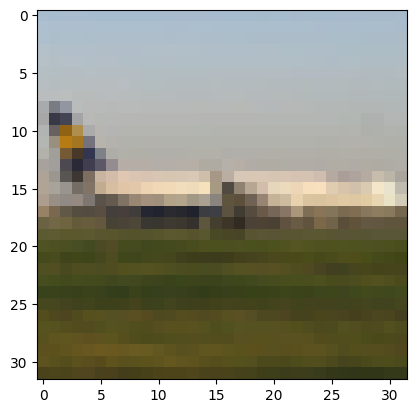

In [ ]:
import matplotlib.pyplot as plt
def show_example(image, label):
  print("Label: ", dataset.classes[label], "(" + str(label) + ")")
  plt.imshow(image.permute(1, 2, 0))

show_example(*dataset[8])

Label:  automobile (1)


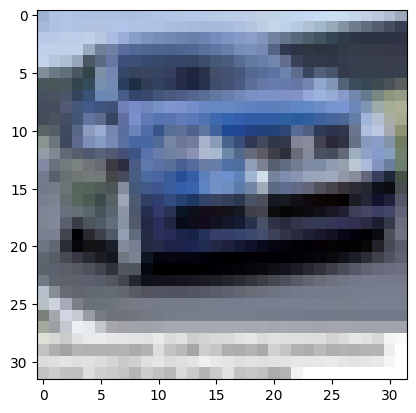

In [ ]:
show_example(*dataset[7008])

### **Splitting Datasets**

When working with datasets, it is often necessary to split them into separate subsets for training, validation, and testing.
* The **training set** is used to train the model.
* The **validation set** is used for hyperparameter tuning and model selection.
* The **testing set** is used for evaluating the final model's performance.

To create a validation set from the training set, we can define a function that randomly selects a specified fraction of the element indices. We can also pass a random seed to the function to ensure reproducibility of the training/validation split in future runs.

In [ ]:
import numpy as np
def split_indices(n, val_perc, random_seed):
  n_val = int(n*val_perc)
  np.random.seed(random_seed)
  # adding permutuation on the dataset from 0 to n-1
  indxs = np.random.permutation(n)
  return indxs[n_val:], indxs[:n_val]

val_percent = 0.2
random_seed  = 1754
total_number = len(dataset)

train_indices, val_indices = split_indices(n = total_number, val_perc = val_percent, random_seed = random_seed)

print("Length of training indices: ", len(train_indices))
print("Length of validation indices: ", len(val_indices))

print("Sample validation indices: ", val_indices[:10])

Length of training indices:  40000
Length of validation indices:  10000
Sample validation indices:  [14181 20890 17628 30184 15739  8046  1629 13889  8897 15405]


### **SubsetRandomSampler and DataLoader**

The SubsetRandomSampler is used to generate indices for creating random subsets of a dataset. It randomly samples a specified fraction or subset of the data indices. This is useful when you want to create subsets for training, validation, or testing, while ensuring that the subsets are representative and randomly selected.

The DataLoader is responsible for loading the data from a dataset using the indices provided by the sampler. It takes care of batching the data, shuffling (if specified), and parallelizing the data loading process. The DataLoader provides an iterable that you can use to access the data and labels in batches during training or validation.

In [ ]:
import torch
from torch.utils.data.sampler import SubsetRandomSampler

batch_size = 100
train_sampler = SubsetRandomSampler(train_indices)
train_loader = torch.utils.data.DataLoader(dataset, batch_size = batch_size, shuffle = False, num_workers = 0, pin_memory = True, sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = torch.utils.data.DataLoader(dataset, batch_size = batch_size, shuffle = False, num_workers = 0, pin_memory = True, sampler = val_sampler)

print("Length of the train loader is: ", len(train_loader))
print("Length of the validation loader is: ", len(val_loader))

Length of the train loader is:  400
Length of the validation loader is:  100


### **make_grid()**

The make_grid() function from the torchvision.utils package is used to create a grid of images from either a 4D mini-batch tensor or a list of tensor images. The images should have the same size.

The function takes a 4D mini-batch tensor as input with a shape of (B * C * H * W), where:

B represents the batch size, i.e., the number of images in the batch.
C represents the number of channels in each image (e.g., 3 for RGB images).
H represents the height of each image.
W represents the width of each image.
Alternatively, you can also pass a list of tensor images as input, where each tensor image has the same size.

The output of the make_grid() function is a torch tensor that contains a grid of images. The grid is formed by arranging the images in a row-by-row fashion, with a specified number of images per row. You can specify the number of images in a row using the nrow parameter.

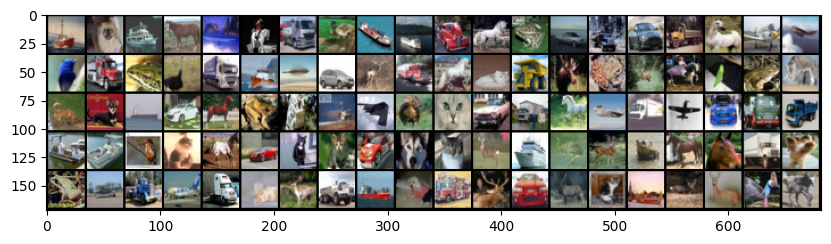

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(data_loader):
  for images, labels in data_loader:
    fig, _ = plt.subplots(figsize = (10, 20))
    plt.imshow(make_grid(images, 20).permute(1, 2, 0))
    break

show_batch(data_loader = train_loader)

### **Moving to GPU**

Moving computations to a GPU can significantly accelerate training and inference processes for deep learning models. GPUs are designed to handle parallel computations, making them well-suited for the matrix operations involved in neural network training.

In [ ]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device("cuda")
  else:
    return torch.device("cpu")

my_device = get_default_device()

def to_device(data, device):
  return data.to(device)

### **Defining the Model**

Convolutional neural network is a type of artificial neural network that is specifically designed for processing data with grid-like structures(images, videos,...)


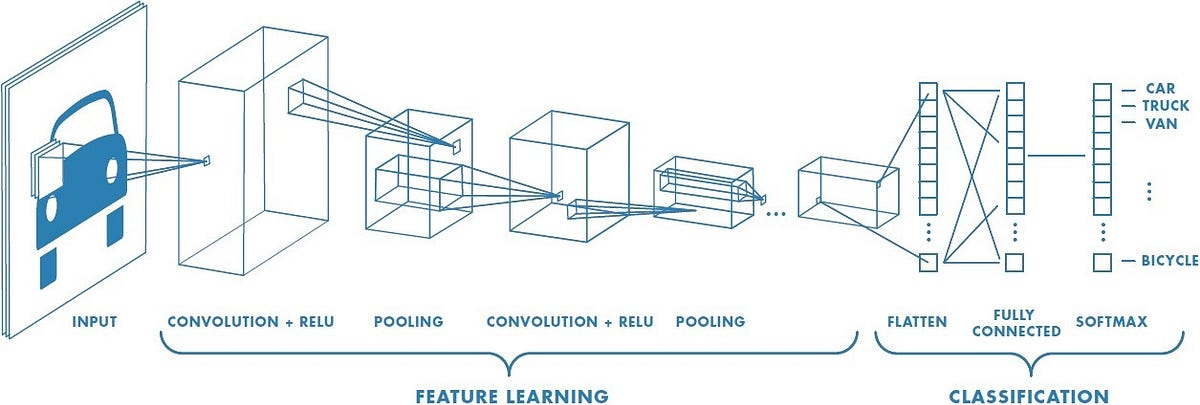

The **input layer** represents the raw input data, typically images or other multidimensional data. The input data is usually represented as a multi-channel tensor, where each channel corresponds to a different feature or color channel.

**Convolutional layers** apply filters (kernels) to the input data, performing convolution operations to extract features. Activation functions like ReLU are often applied after each convolutional layer to introduce non-linearity.

**Pooling layers** are used to downsample the spatial dimensions of the feature maps. Max pooling is a common choice, which partitions the feature maps into non-overlapping regions and outputs the maximum value within each region.

CNN architectures often repeat convolutional and pooling layers multiple times to capture more abstract and high-level features. The number of these repetitions can vary depending on the complexity of the task and the depth of the network.

**Fully connected layers**, also known as linear layers, are typically placed towards the end of the CNN. These layers connect every neuron from the previous layer to the neurons in the current layer. Fully connected layers are commonly used for classification tasks, where they map the learned features to the desired number of output classes.

The **output layer** depends on the specific task. For multi-class classification, a softmax activation is often used to produce a probability distribution over different classes. For regression tasks, a linear activation function may be used.

In [ ]:
import torch
def conv_block(in_channels, out_channels, pool = False):
  layers = [torch.nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(out_channels),
            torch.nn.ReLU(inplace = True)]
  if pool: layers.append(torch.nn.MaxPool2d(kernel_size = (2,2), stride = (2,2) ))
  return torch.nn.Sequential(*layers)

class Conv_Model(torch.nn.Module):
  def __init__(self, input_channels, number_of_classes):
    super(Conv_Model, self).__init__()
                                                            # (batch_size, 64, new_height, new_width)
    self.conv1 = conv_block(input_channels, 64)             # 100 * 64 * 32 * 32
    self.conv2 = conv_block(64, 128, pool = True)           # 100 * 128 * 16 * 16
    self.conv3 = conv_block(128, 256, pool = True)          # 100 * 256 * 8 * 8
    self.conv4 = conv_block(256, 512, pool = True)          # 100 * 512 * 4 * 4

    self.classifier = torch.nn.Sequential(torch.nn.AdaptiveMaxPool2d(1),        # 100 * 512 * 1 * 1
                       torch.nn.Flatten(),                   # 100 * 512
                       torch.nn.Dropout(0.2),
                       torch.nn.Linear(512, number_of_classes),
                       torch.nn.Softmax(dim = 1))

  def forward(self, x):
    out = self.conv1(x)
    out = self.conv2(out)
    out = self.conv3(out)
    out = self.conv4(out)
    out = self.classifier(out)
    return out

input_channels = 3
number_of_classes = 10
model = Conv_Model(input_channels = input_channels, number_of_classes = number_of_classes)
model = to_device(model, my_device)

In [ ]:
for images, targets in train_loader:
  print("The shape of images is: ", images.shape)

  images = to_device(images, my_device)
  targets = to_device(targets, my_device)

  predictions = model(images)
  print("Model predicted image: ", predictions[0])
  print("Real image: ", targets[0])

  # if we add all the predictions of one dataset it will be one
  print("The sum of probabilities is: ", torch.sum(predictions[0]).item())
  print("The largest probability is: ", torch.max(predictions[0]).item())
  print("The index of the largest propapility is: ", torch.argmax(predictions[0]))
  break



The shape of images is:  torch.Size([100, 3, 32, 32])
Model predicted image:  tensor([0.4719, 0.0832, 0.0381, 0.0064, 0.0147, 0.1147, 0.0227, 0.0326, 0.0382,
        0.1776], device='cuda:0', grad_fn=<SelectBackward0>)
Real image:  tensor(7, device='cuda:0')
The sum of probabilities is:  1.0
The largest probability is:  0.4718814492225647
The index of the largest propapility is:  tensor(0, device='cuda:0')


### **Training the Model**

Iterate over the training dataset in mini-batches. For each mini-batch, perform the following steps:
* Move the mini-batch to the appropriate device.
* Pass the input data through the model to obtain the predicted outputs.
* Compute the loss by comparing the predicted outputs with the ground truth labels.
* Compute the gradients of the loss with respect to the model parameters
* Update the model parameters by applying the optimizer's update rule.
* Compute the loss and accuracy to monitor the training progress.

In [ ]:
import torch.nn as nn
import torch.optim as optim

# defining the loss function
entropy = torch.nn.CrossEntropyLoss()

# defining optimizer
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
# training the model
def train(num_epochs):
  model.train()
  running_loss = 0
  correct_samples = 0
  total = 0

  for inputs, targets in train_loader:
    inputs = to_device(inputs, my_device)
    targets = to_device(targets, my_device)

    # passing inputs to model
    predictions = model(inputs)

    # calculating loss
    loss = entropy(predictions, targets)

    # calculating gradient
    loss.backward()

    # updating weights
    optimizer.step()

    # resetting gradients
    optimizer.zero_grad()

    # running average of the loss
    running_loss += loss.item()
    _, scores = predictions.max(dim = 1)

    # calculating the sum of the matched elements
    correct_samples += (scores == targets).sum().item()

    # overall count of samples seen during training
    total += targets.size(0)

  # calculating total running loss and accuracy
  train_loss = running_loss/len(train_loader)
  accuracy = (correct_samples/total)*100

  print("The training loss is: ", train_loss)
  print("The training accuracy is: ", accuracy)


In [ ]:
epochs = 10
for epoch in range(epochs):
  train(epochs)

The training loss is:  2.3338368552923203
The training accuracy is:  12.684999999999999
The training loss is:  2.3368209636211397
The training accuracy is:  12.354999999999999
The training loss is:  2.3464776676893235
The training accuracy is:  11.4025
The training loss is:  2.3404020369052887
The training accuracy is:  12.002500000000001
The training loss is:  2.303734129667282
The training accuracy is:  15.329999999999998
The training loss is:  2.2656351578235627
The training accuracy is:  19.35
The training loss is:  2.2506615513563157
The training accuracy is:  20.95
The training loss is:  2.2387986427545545
The training accuracy is:  22.145
The training loss is:  2.2488805294036864
The training accuracy is:  21.127499999999998
The training loss is:  2.239173637032509
The training accuracy is:  22.112499999999997


### **Testing the Model**

Testing a trained model involves evaluating its performance on a separate testing dataset that was not used during the training or validation stages.

Testing process:
* Switch the model to evaluation mode using the model.eval() method.
* Iterate over the testing dataset, typically in mini-batches, similar to the training process.
* After iterating over the entire testing dataset, compute the overall performance metrics based on the accumulated results. These metrics provide an assessment of the model's performance on unseen data.

In [ ]:
import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

data_dir = "/content/sample_data/cifar10/test"
test_dataset = ImageFolder(root = data_dir, transform = transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = False, num_workers = 0, pin_memory = True)


In [ ]:
def predict_image(img, model):
  xb = image.unsqueeze(0)
  test_img = to_device(xb, my_device)
  model = to_device(model, my_device)
  predictions = model(test_img)
  _, scores = torch.max(predictions, dim = 1)
  return test_dataset.classes[scores[0].item()]

Label:  airplane (0)
Predicted image: bird
AxesImage(size=(32, 32))


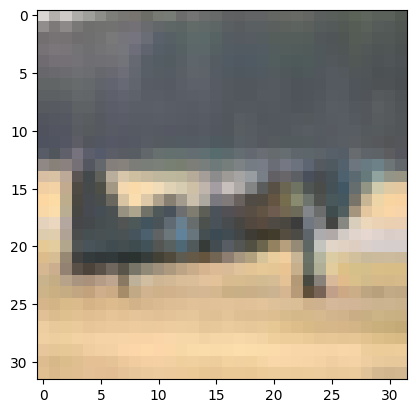

In [ ]:
import matplotlib.pyplot as plt
def show_example(image, label):
  print("Label: ", test_dataset.classes[label], "(" + str(label) + ")")
  print("Predicted image:", predict_image(image, model))
  print(plt.imshow(image.permute(1,2,0)))

show_example(*test_dataset[6])

In [ ]:
# calculating overall loss and accuracy
def test():
  model.eval()
  running_loss = 0
  correct_samples = 0
  total_size = 0

  with torch.no_grad():
    for inputs , targets in test_loader:
      inputs = to_device(inputs, my_device)
      targets = to_device(targets, my_device)
      outputs = model(inputs)
      loss = entropy(outputs , targets)

      running_loss += loss.item()
      _ , predicted = outputs.max(dim = 1)
      correct_samples += (predicted == targets).sum().item()
      total_size += targets.size(0)

  test_loss  = running_loss/len(test_loader)
  test_accuracy = (correct_samples/total_size)*100
  print("The total loss of the testset is:", test_loss)
  print("The total accuracy of the testset: ", test_accuracy)

test()

The total loss of the testset is: 2.22854719042778
The total accuracy of the testset:  23.21
